In [161]:
from pathlib import Path
import matplotlib.pylab as plt
import numpy as np
import pandas as pd 
from util import get_files
from mne import read_epochs
import itertools as it

In [162]:
def many_is_in(multiple, target):
    check_ = []
    for i in multiple:
        check_.append(i in target)
    return any(check_)

In [163]:
MEG_PROC = Path("/home/mszul/datasets/act_mis/MEG/processed/")
BEH_PROC = Path("/home/mszul/datasets/act_mis/BEH/")
all_fif_paths = get_files(MEG_PROC, "*.fif", strings=["zapline", "observation-epo"])
all_fif_paths = [i for i in all_fif_paths if "autoreject" not in i.stem]
all_ar_paths = get_files(MEG_PROC, "*.h5", strings=["autoreject", "zapline", "observation-epo"])
all_beh_paths = get_files(BEH_PROC, "*.csv")

In [164]:
epo_dict = {}
for epo in all_fif_paths:
    epochs = read_epochs(epo, verbose=False)
    epoch_events = epochs.events[:,2]
    epoch_events[epoch_events == 5] = 1
    epoch_events[epoch_events == 10] = -1
    epo_dict[epo.stem] = epoch_events

subj = np.unique([i.parent.parts[-1] for i in all_fif_paths])
all_beh_paths_sel = [i for i in all_beh_paths if many_is_in(subj, i.parent.parts[-1])]

beh_dict = {}
for beh in all_beh_paths_sel:
    obs_vals = pd.read_csv(beh, index_col=0)["obs_dir_mod"].values
    obs_vals = obs_vals[obs_vals != 0]
    beh_dict[beh.stem] = obs_vals

In [165]:
ress = np.zeros([len(all_fif_paths), len(all_beh_paths_sel)])
for x_ix, x_k in enumerate(all_fif_paths):
    for y_ix, y_k in enumerate(all_beh_paths_sel):
        res = None
        try:
            res = np.mean(epo_dict[x_k.stem] == beh_dict[y_k.stem])
        except:
            res = 0.0
        
        if res == 1.0:
            res = 1.0
        elif all([res > 0.0, res < 1.0]):
            res = 0.5
        ress[x_ix, y_ix] = res

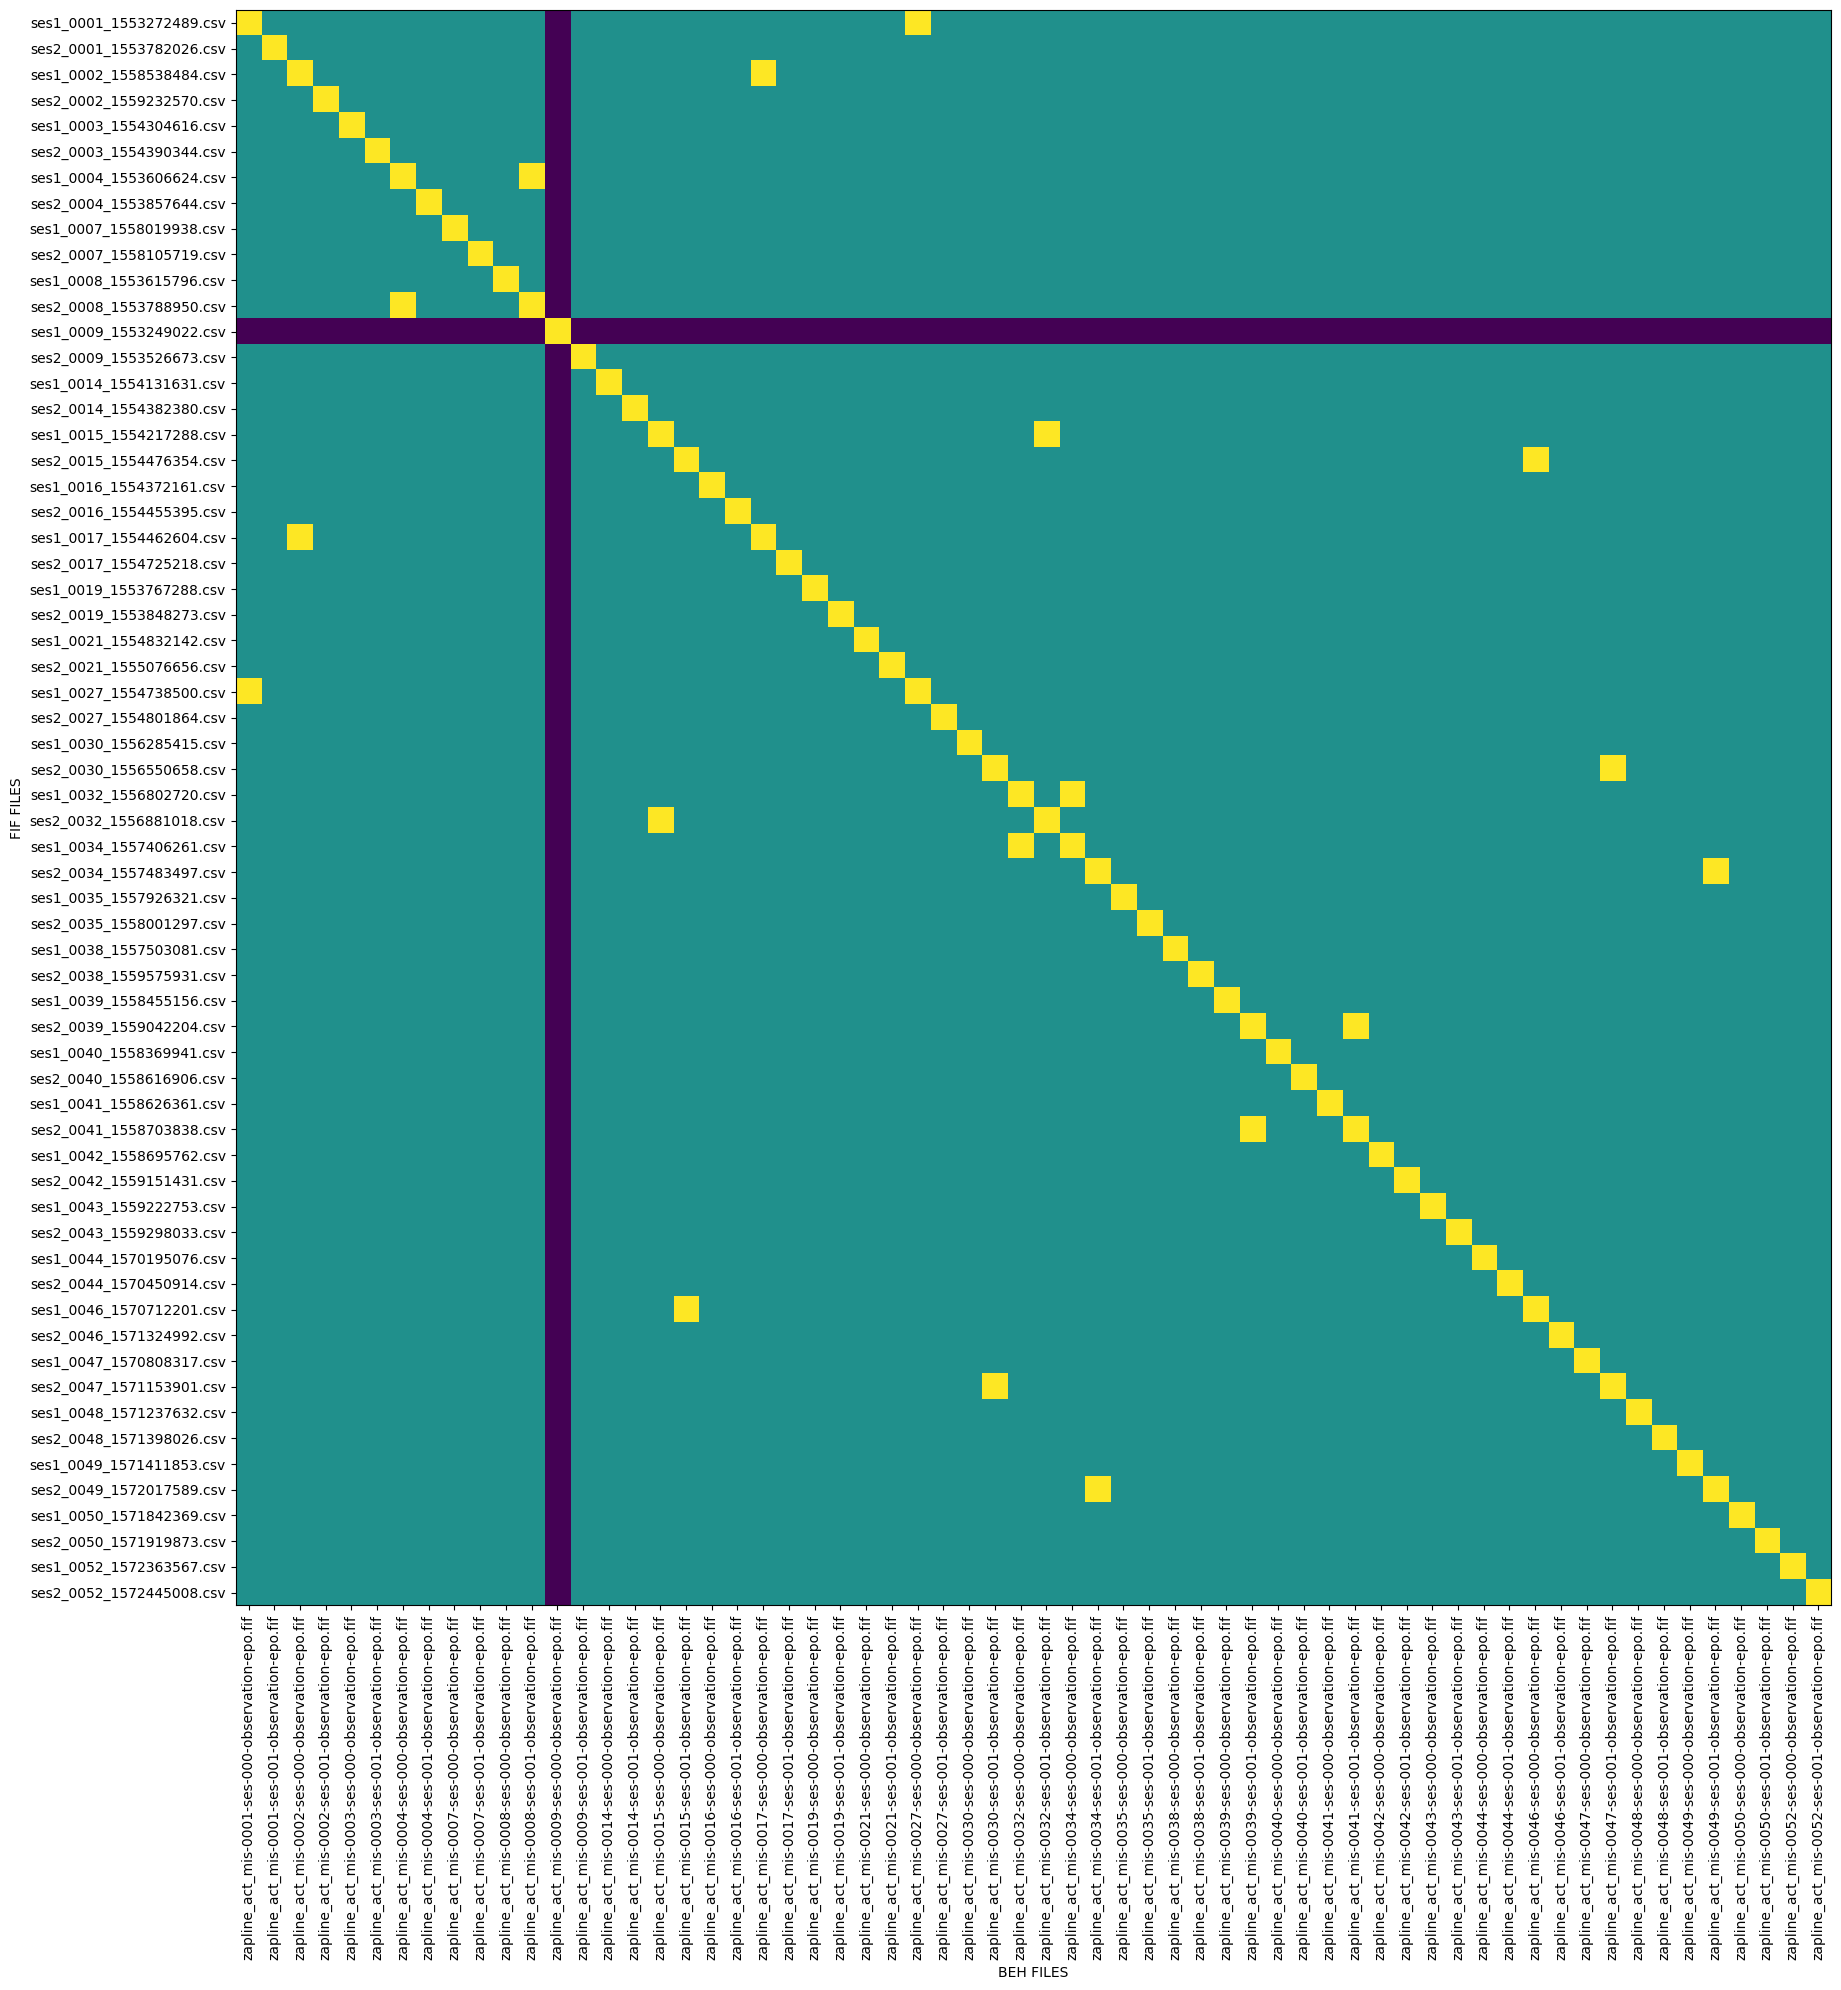

In [166]:
f, ax = plt.subplots(1,1, figsize=(20, 20))
ax.imshow(ress)
ax.set_ylabel("FIF FILES")
ax.set_xlabel("BEH FILES")
ax.set_xticks(np.arange(len(all_beh_paths_sel)))
ax.set_yticks(np.arange(len(all_fif_paths)))
ax.set_yticklabels([i.name for i in all_beh_paths_sel])
ax.set_xticklabels([i.name for i in all_fif_paths])
plt.xticks(rotation=90)
plt.tight_layout();

In [136]:
len(all_fif_paths)

62